In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv('longley.csv')
data = data.drop('Population', axis=1)

X, y = data.drop('Employed', axis=1), data.Employed
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=42)

In [14]:
lin_reg = LinearRegression().fit(train_X, train_y)

print('Score train: ', lin_reg.score(train_X, train_y))
print('Score test: ', lin_reg.score(test_X, test_y))

Score train:  0.9995200489579817
Score test:  0.9808946284511154


In [16]:
alphas = [10**(-3 + 0.2*i) for i in range(26)]
train_score = []
test_score = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(train_X, train_y)
    
    train_score.append(ridge.score(train_X, train_y))
    test_score.append(ridge.score(test_X, test_y))

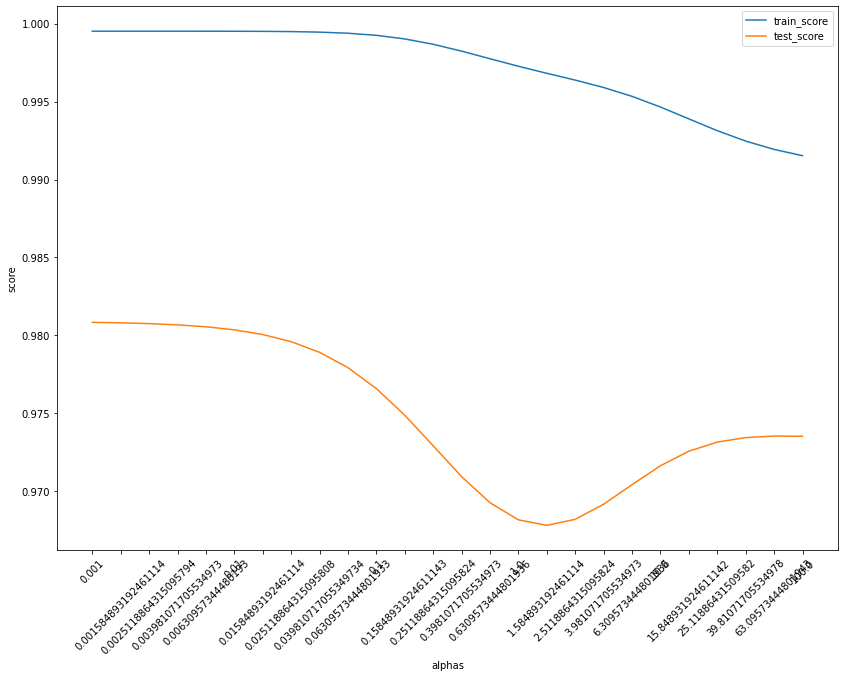

In [29]:
plt.figure(figsize=(14, 10))
plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.xticks(range(len(alphas)), alphas, rotation=45)
plt.xlabel('alphas')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()